In [2]:
# <span style="color:green">Data Scientist / Data Analysis and Visualization / Exploratory Data Visualization </span> / Bar Plots And Scatter Plots

In [3]:
#Get the file directly from internet:
import pandas as pd

from io import BytesIO
import requests

url ='https://raw.githubusercontent.com/fivethirtyeight/data/master/fandango/fandango_score_comparison.csv'

response = requests.get(url)
content = BytesIO(response.content)
fandango = pd.read_csv(content ,encoding="Latin-1")#The 'encoding' is new here, nbut I don't know how you should know that.

fandango.shape

(146, 22)

In [4]:
import pandas as pd # import locally

fandango= pd.read_csv('fandango_score_comparison.csv' ,encoding="Latin-1")

In [5]:
fandango.shape

(146, 22)

In [6]:
# Read fandango_scores_comparison.csv into a Dataframe named reviews.
reviews = fandango
reviews[0:1]

FILM  RottenTomatoes  RottenTomatoes_User  \
0  Avengers: Age of Ultron (2015)              74                   86   

   Metacritic  Metacritic_User  IMDB  Fandango_Stars  Fandango_Ratingvalue  \
0          66              7.1   7.8             5.0                   4.5   

   RT_norm  RT_user_norm         ...           IMDB_norm  RT_norm_round  \
0      3.7           4.3         ...                 3.9            3.5   

   RT_user_norm_round  Metacritic_norm_round  Metacritic_user_norm_round  \
0                 4.5                    3.5                         3.5   

   IMDB_norm_round  Metacritic_user_vote_count  IMDB_user_vote_count  \
0              4.0                        1330                271107   

   Fandango_votes  Fandango_Difference  
0           14846                  0.5  

[1 rows x 22 columns]

In [7]:
norm_reviews = reviews[['FILM','RT_user_norm','Metacritic_user_nom','IMDB_norm','Fandango_Ratingvalue','Fandango_Stars']]
norm_reviews[0:1]

FILM  RT_user_norm  Metacritic_user_nom  \
0  Avengers: Age of Ultron (2015)           4.3                 3.55   

   IMDB_norm  Fandango_Ratingvalue  Fandango_Stars  
0        3.9                   4.5             5.0

### 4: Creating Bars



In [8]:
import matplotlib.pyplot as plt

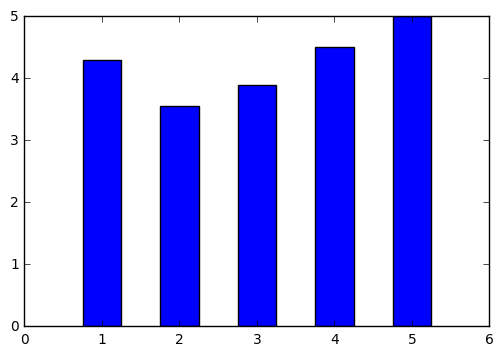

In [9]:
# Positions of the left sides of the bars. [0.75, 1.75, 2.75, 3.75, 4.75]
from numpy import arange

# Heights of the bars.  In our case, the average rating for the first movie in the dataset.
num_cols = ['RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue', 'Fandango_Stars']
bar_heights = norm_reviews.ix[0, num_cols].values
bar_positions = arange(5) + 0.75

fig, ax = plt.subplots()

ax.bar(bar_positions, bar_heights, 0.5)
plt.show()


### 5: Aligning Axis Ticks And Labels

In [10]:
num_cols = ['RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue', 'Fandango_Stars']
bar_heights = norm_reviews.ix[0, num_cols].values
bar_positions = arange(5) + 0.75
tick_positions = range(1,6)
fig, ax = plt.subplots()

ax.bar(bar_positions, bar_heights, 0.5)
ax.set_xticks(tick_positions)
ax.set_xticklabels(num_cols, rotation=90)

ax.set_xlabel('Rating Source')
ax.set_ylabel('Average Rating')
ax.set_title('Average User Rating For Avengers: Age of Ultron (2015)')
plt.show()

### 6: Horizontal Bar Plot

In [11]:
import matplotlib.pyplot as plt
from numpy import arange
num_cols = ['RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue', 'Fandango_Stars']

bar_widths = norm_reviews.ix[0, num_cols].values
bar_positions = arange(5) + 0.75
tick_positions = range(1,6)

# Create a single subplot and assign the returned Figure object to fig and the returned Axes object to ax.
fig, ax = plt.subplots()

ax.barh(bar_positions, bar_widths, 0.5)

ax.set_yticks(tick_positions)
ax.set_yticklabels(num_cols)
ax.set_ylabel('Rating Source')
ax.set_xlabel('Average Rating')
ax.set_title('Average User Rating For Avengers: Age of Ultron (2015)')
plt.show()

### 7: Scatter plot

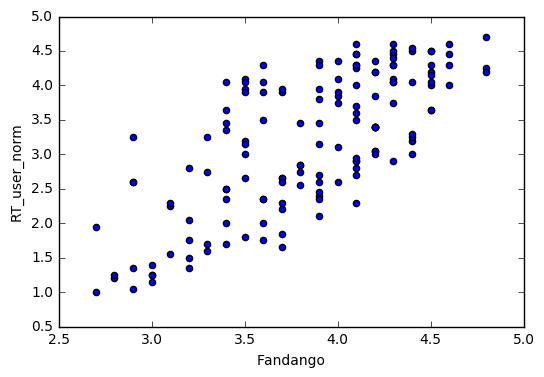

In [12]:
import matplotlib.pyplot as plt

# Create a single subplot and assign the returned Figure object to fig and the returned Axes object to ax.
fig, ax = plt.subplots()

x_value = reviews['Fandango_Ratingvalue']
y_value = reviews['RT_user_norm']

#ax.plot(x_value, y_value)

#To generate a scatter plot, we use Axes.scatter().
ax.scatter(x_value,y_value)

# Set the labels
plt.xlabel('Fandango')
plt.ylabel('RT_user_norm')

plt.show()

### 8: Switching axes

In [34]:

fig = plt.figure(figsize=(5,10))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)


x_value = reviews['Fandango_Ratingvalue']
y_value = reviews['RT_user_norm']

#To generate a scatter plot, we use Axes.scatter().
ax1.scatter(x_value,y_value)

ax1.set_xlabel('Fandango')
ax1.set_ylabel('RT_user_norm')

ax2.scatter(y_value,x_value)

ax2.set_xlabel('RT_user_norm')
ax2.set_ylabel('Fandango')
# The ranges for both axes don't match!!!
plt.show()

### 9: Benchmarking correlation
When generating multiple scatter plots for the purpose of comparison, it's important that all plots share the same ranges in the x-axis and y-axis. In the 2 plots we generated in the last step, the ranges for both axes didn't match. We can use Axes.set_xlim() and Axes.set_ylim() to set the data limits for both axes:

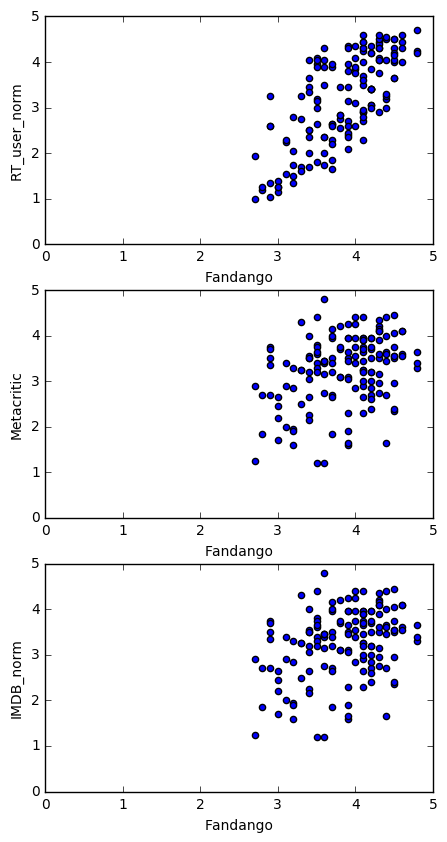

In [40]:

fig = plt.figure(figsize=(5,10))
ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)

# Step1: set the graph's limits:
ax1.set_xlim(0, 5)
ax1.set_ylim(0, 5)

ax2.set_xlim(0, 5)
ax2.set_ylim(0, 5)

ax3.set_xlim(0, 5)
ax3.set_ylim(0, 5)

# Allocate columns to variables:
x_value = reviews['Fandango_Ratingvalue']
y_value = reviews['RT_user_norm']

x2_value = reviews['Fandango_Ratingvalue']
y2_value = reviews['Metacritic_user_nom']

x3_value = reviews['Fandango_Ratingvalue']
y3_value = reviews['IMDB_norm']

#To generate a scatter plot, we use Axes.scatter().
ax1.scatter(x_value,y_value)
ax1.set_xlabel('Fandango')
ax1.set_ylabel('RT_user_norm')

ax2.scatter(x2_value,y2_value)
ax2.set_xlabel('Fandango')
ax2.set_ylabel('Metacritic')

ax3.scatter(x2_value,y2_value)
ax3.set_xlabel('Fandango')
ax3.set_ylabel('IMDB_norm')


plt.show()

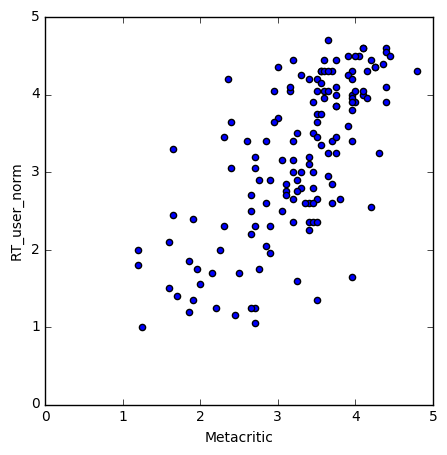

In [44]:

fig = plt.figure(figsize=(5,5))
ax1 = fig.add_subplot(1,1,1)


# Step1: set the graph's limits:
ax1.set_xlim(0, 5)
ax1.set_ylim(0, 5)


# Allocate columns to variables:
x_value = reviews['Metacritic_user_nom']
y_value = reviews['RT_user_norm']



#To generate a scatter plot, we use Axes.scatter().
ax1.scatter(x_value,y_value)
ax1.set_xlabel('Metacritic')
ax1.set_ylabel('RT_user_norm')



plt.show()